<a href="https://colab.research.google.com/github/pinaki-jayakar/pinaki-jayakar.github.io/blob/main/Stop_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow 
!pip install tensorflow keras 
!pip install tensorflow sklearn 
!pip install tensorflow matplotlib 
!pip install tensorflow pandas 
!pip install tensorflow pil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=d5e36077fdbede65ee3316d5330dc2353b0b1ac71ecb38d9eccfac49602470d1
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pil (from ver

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 43

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pinakijayakar","key":"0bef5c1e568ccd0000a776dc0b64da5e"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 593M/612M [00:03<00:00, 148MB/s]
100% 612M/612M [00:03<00:00, 172MB/s]


In [ ]:
!mkdir Dataset
!unzip -q /content/gtsrb-german-traffic-sign.zip -d /content/Dataset
!rm /content/gtsrb-german-traffic-sign.zip

In [ ]:
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join(cur_path,'Dataset/Train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
    try: 
      image = Image.open(path + "/"+ a) 
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
x1, x2, y1, y2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x1.shape, x2.shape, y1.shape, y2.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y1 = to_categorical(y1, 43)
y2 = to_categorical(y2, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch = 20
anc = model.fit(x1, y1, batch_size=32, epochs=epoch, validation_data=(x2, y2))
model.save("model.h5")

Epoch 1/20
981/981 [==============================] - 165s 166ms/step - loss: 2.0649 - accuracy: 0.4597 - val_loss: 0.7759 - val_accuracy: 0.8113
Epoch 2/20
981/981 [==============================] - 158s 161ms/step - loss: 0.9038 - accuracy: 0.7309 - val_loss: 0.3635 - val_accuracy: 0.8984
Epoch 3/20
981/981 [==============================] - 160s 163ms/step - loss: 0.5888 - accuracy: 0.8224 - val_loss: 0.2604 - val_accuracy: 0.9297
Epoch 4/20
981/981 [==============================] - 167s 170ms/step - loss: 0.4673 - accuracy: 0.8580 - val_loss: 0.1745 - val_accuracy: 0.9507
Epoch 5/20
981/981 [==============================] - 161s 164ms/step - loss: 0.4181 - accuracy: 0.8743 - val_loss: 0.1734 - val_accuracy: 0.9523
Epoch 6/20
981/981 [==============================] - 158s 161ms/step - loss: 0.3629 - accuracy: 0.8908 - val_loss: 0.1426 - val_accuracy: 0.9546
Epoch 7/20
981/981 [==============================] - 162s 165ms/step - loss: 0.3537 - accuracy: 0.8925 - val_loss: 0.1711 -

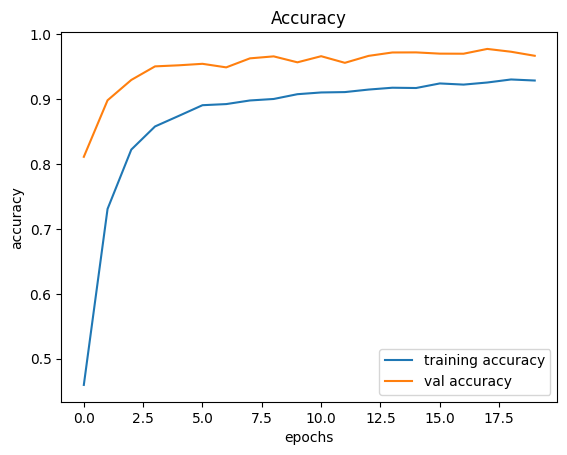

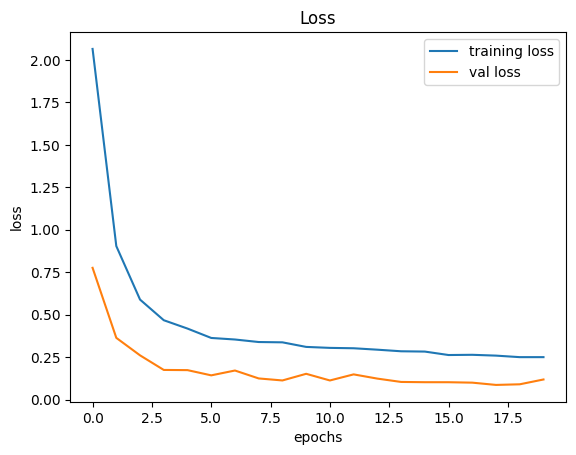

In [ ]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/Dataset/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [ ]:
for img in imgs:
   image = Image.open('Dataset/'+img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred=model.predict(X_test) 
pred=np.argmax(pred,axis=1)
model.save('traffic_classifier.h5')

2369/2369 [==============================] - 86s 36ms/step
